In [56]:
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras import utils


import warnings
warnings.filterwarnings('ignore')

In [57]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [58]:
print(y_test.shape)

(10000,)


In [59]:
print(x_train.shape)

(60000, 28, 28)


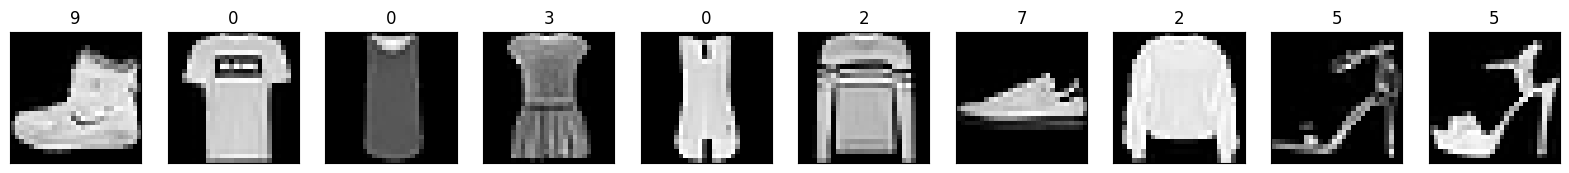

In [60]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [61]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [62]:
print(y_train)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
print(y_test)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [64]:
print(y_test.shape)

(10000, 10)


In [65]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                7850      
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 10)                60        
                                                                 
Total params: 7965 (31.11 KB)
Trainable params: 7965 (31.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


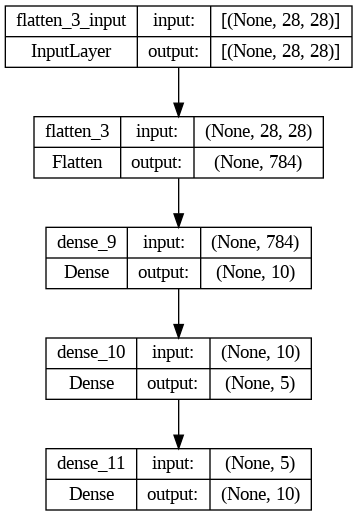

In [67]:
utils.plot_model(model, show_shapes=True)

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [69]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.9555 - acc: 0.2632 - val_loss: 1.5932 - val_acc: 0.3404
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4948 - acc: 0.3551 - val_loss: 1.4293 - val_acc: 0.4118
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3569 - acc: 0.4119 - val_loss: 1.3269 - val_acc: 0.4415
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2803 - acc: 0.4504 - val_loss: 1.4013 - val_acc: 0.4317
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2802 - acc: 0.4204 - val_loss: 1.3078 - val_acc: 0.4390
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2186 - acc: 0.4615 - val_loss: 1.1897 - val_acc: 0.4971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1816 - acc: 0.4875 - val_loss: 1.1907 - val_acc: 0.5294
Epoch 8/10
1875/1875 [==============================] - 4s 2ms

In [70]:
model.save('fashion_mnist_models_scifers.h5')

In [71]:
print(history.history)

{'loss': [1.9554650783538818, 1.4948283433914185, 1.356899619102478, 1.280314564704895, 1.2802308797836304, 1.2185580730438232, 1.1816242933273315, 1.1333322525024414, 1.0789439678192139, 1.079595923423767], 'acc': [0.2631833255290985, 0.35510000586509705, 0.41188332438468933, 0.4504333436489105, 0.4204166531562805, 0.4614500105381012, 0.4874500036239624, 0.5407000184059143, 0.5550833344459534, 0.5489333271980286], 'val_loss': [1.5931963920593262, 1.429338812828064, 1.3268829584121704, 1.4012569189071655, 1.307775855064392, 1.1897085905075073, 1.19066321849823, 1.0645809173583984, 1.1026475429534912, 1.1114944219589233], 'val_acc': [0.34040001034736633, 0.41179999709129333, 0.4415000081062317, 0.4316999912261963, 0.4390000104904175, 0.49709999561309814, 0.5293999910354614, 0.5659000277519226, 0.541100025177002, 0.5378999710083008]}


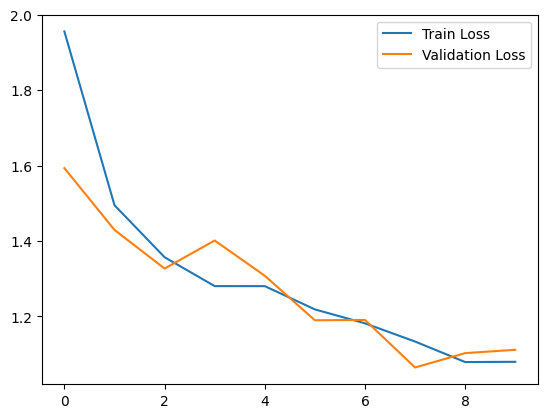

In [72]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

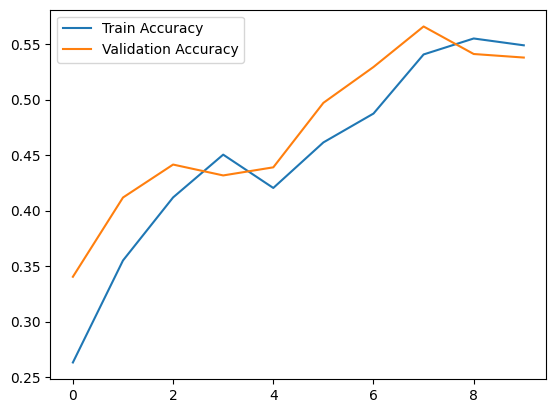

In [73]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()

In [74]:
import tensorflow as tf

In [75]:
model = tf.keras.models.load_model('fashion_mnist_models_scifers.h5')

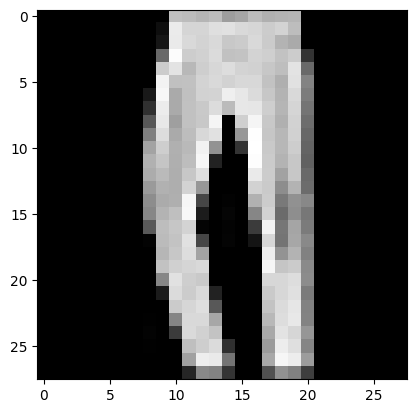

In [81]:
plt.imshow(x_test[5], cmap='gray')

In [82]:
import numpy as np
x = np.reshape(x_test[5], (1, 28, 28))
predicted_label = np.argmax(model.predict(x))
print(predicted_label)

1/1 [==============================] - 0s 20ms/step
1
